In [2]:
import pandas as pd

# Read a text file with a specific delimiter (e.g., tab-delimited)
df1 = pd.read_csv('internship Genome//all_metadata.txt', delimiter='\t')
df = pd.read_csv('internship Genome//all_transcripts.txt', delimiter='\t', index_col='GeneID')
# Display the first few rows of the dataframe

df = df[['C01','C02','C03']].iloc[1:5]
print(df)


                C01    C02    C03
GeneID                           
JR_118348015  44179  32759  27319
JR_26380875   25996  27723  13505
JR_108999013  14625  10419  10772
JR_26380785   14119   8432   6631


In [8]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset
import numpy as np
np.random.seed(0)

chr_bed_file = load_eukaryote_example_dataset("hg38")[0]
circos = Circos.initialize_from_bed(chr_bed_file, start=-80, end=260, space=3, endspace=False)

In [17]:
circos.text("Homo sapiens\n(hg38)", size=15)
ColorCycler.set_cmap("gist_rainbow")
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}

In [18]:
for sector in circos.sectors:
    # Plot chromosome outer track
    sector.text(sector.name.replace("chr", ""))
    color = chr_name2color[sector.name]
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    # Create example x,y plot data
    step = 10000000
    x = np.arange(sector.start + (step / 2), sector.end - (step / 2), step)
    y = np.random.randint(0, 100, size=len(x))
    # Scatter track
    track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
    track1.axis()
    track1.scatter(x, y, s=6, color="red")
    # Line track
    track2 = sector.add_track((65, 75), r_pad_ratio=0.1)
    track2.axis()
    track2.line(x, y, color="blue")
    # Bar track
    track3 = sector.add_track((50, 60), r_pad_ratio=0.1)
    track3.axis()
    track3.bar(x, y, width=step * 0.7, color="olive")
    # Fill between track
    track4 = sector.add_track((35, 45), r_pad_ratio=0.1)
    track4.axis()
    track4.grid()
    track4.fill_between(x, y, color="violet")
    # Plot track labels
    if sector.name == circos.sectors[0].name:
        circos.text("Chr", r=outer_track.r_center, deg=-90)
        circos.text("a", r=track1.r_center, deg=-90, color="red")
        circos.text("b", r=track2.r_center, deg=-90, color="blue")
        circos.text("c", r=track3.r_center, deg=-90, color="olive")
        circos.text("d", r=track4.r_center, deg=-90, color="violet")

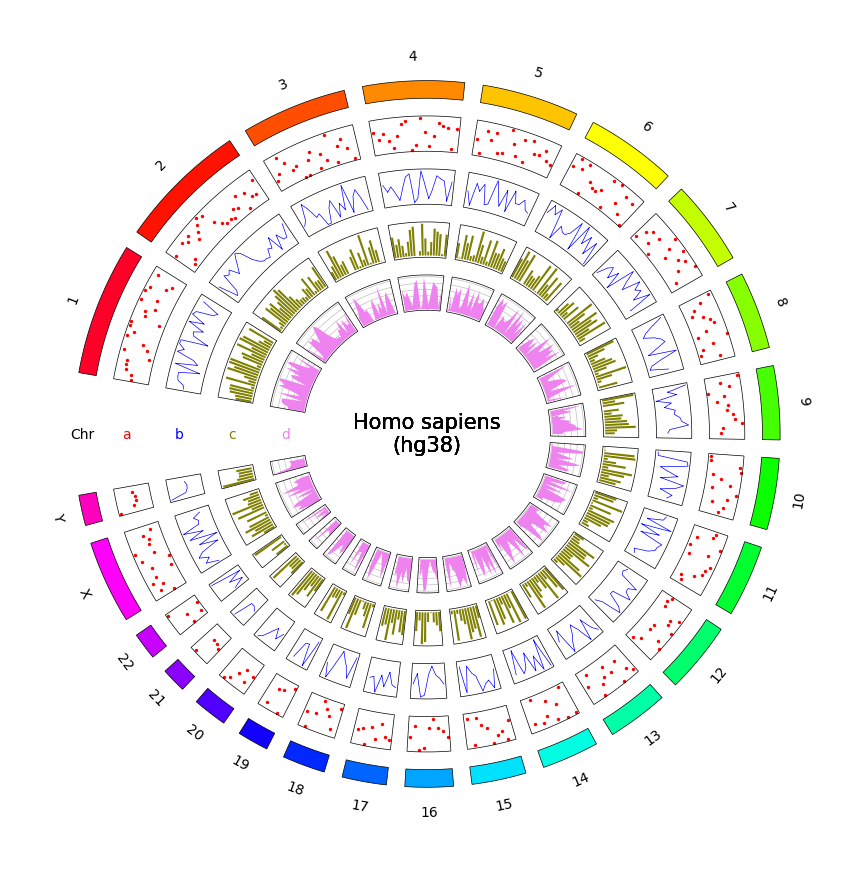

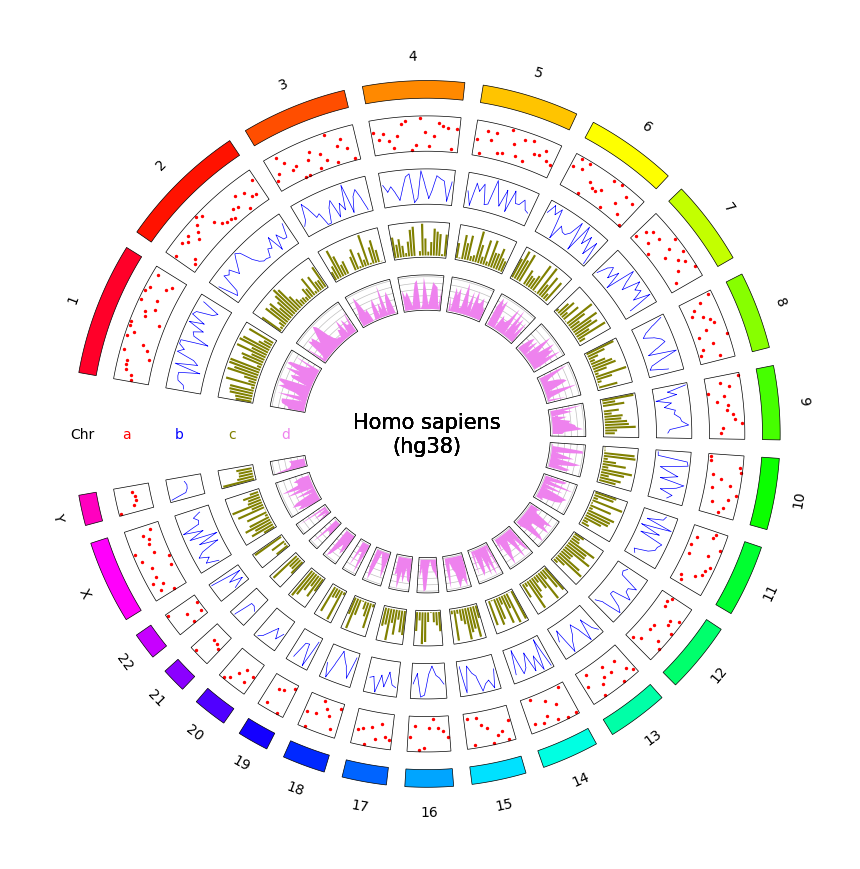

In [19]:
circos.plotfig()

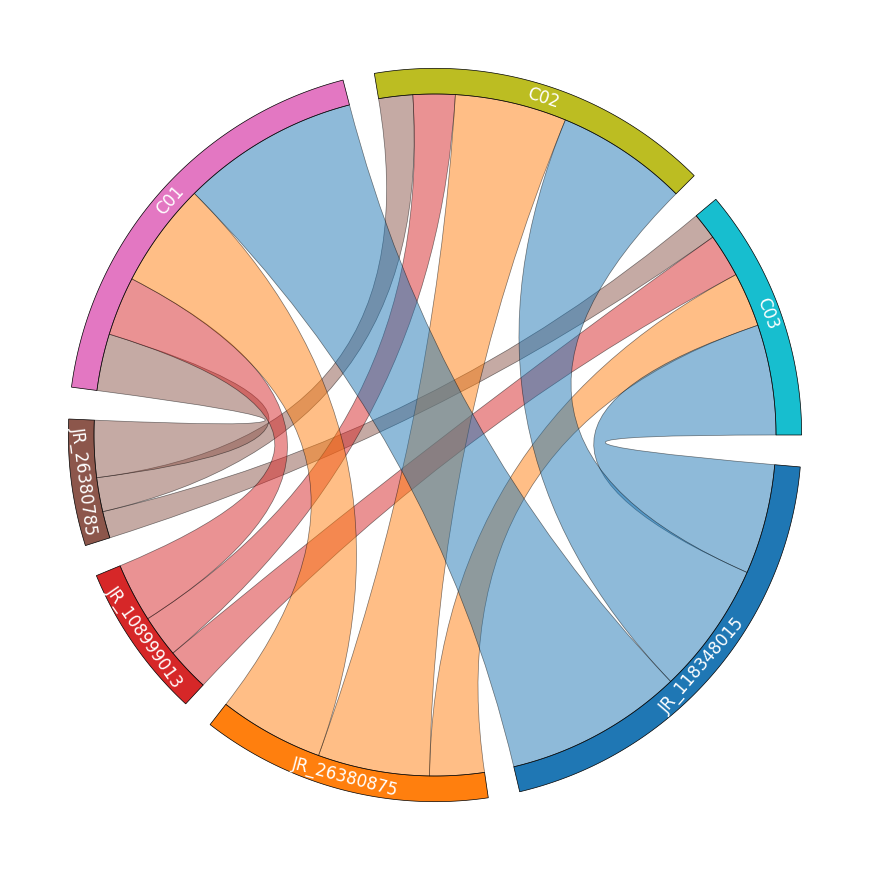

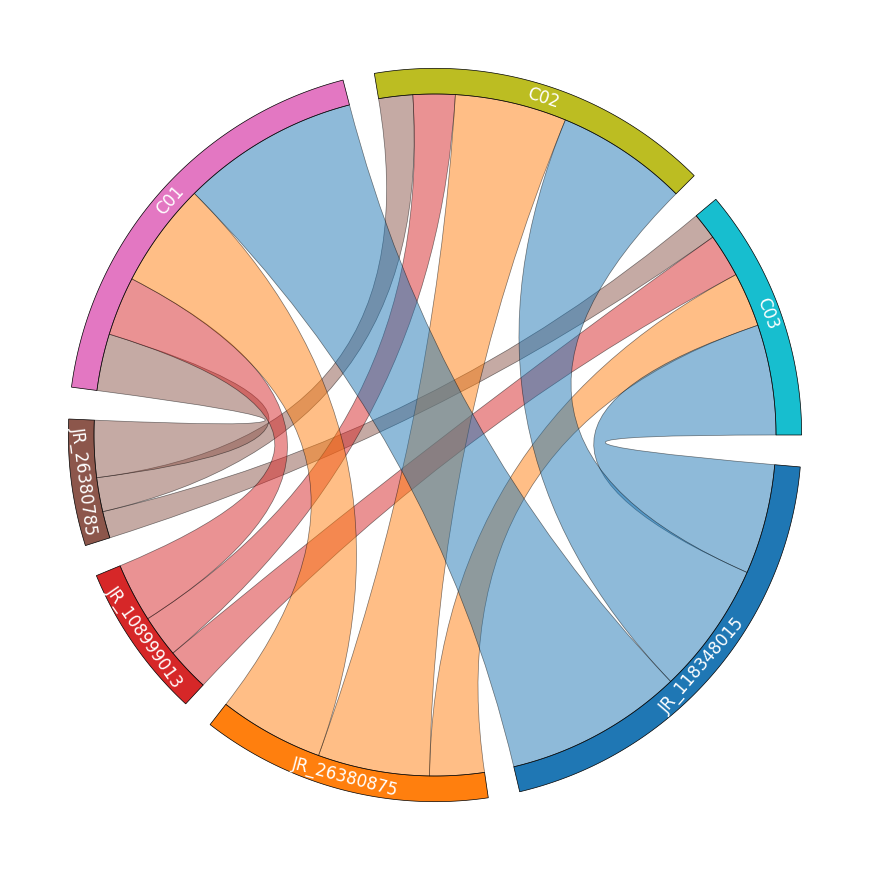

In [5]:
from pycirclize import Circos
import matplotlib.pyplot as plt

circos = Circos.initialize_from_matrix(
    df,
    cmap="tab10",
    start=-265,
    end=95,
    space=5,
    r_lim=(93, 100),
    label_kws=dict(r=94, size=12, color="white"),
    link_kws=dict(ec="black", lw=0.5),
)
circos.plotfig()